## Recurrent Neural Network

@author : Amit Kumar<br>
@date : 24/04/2019

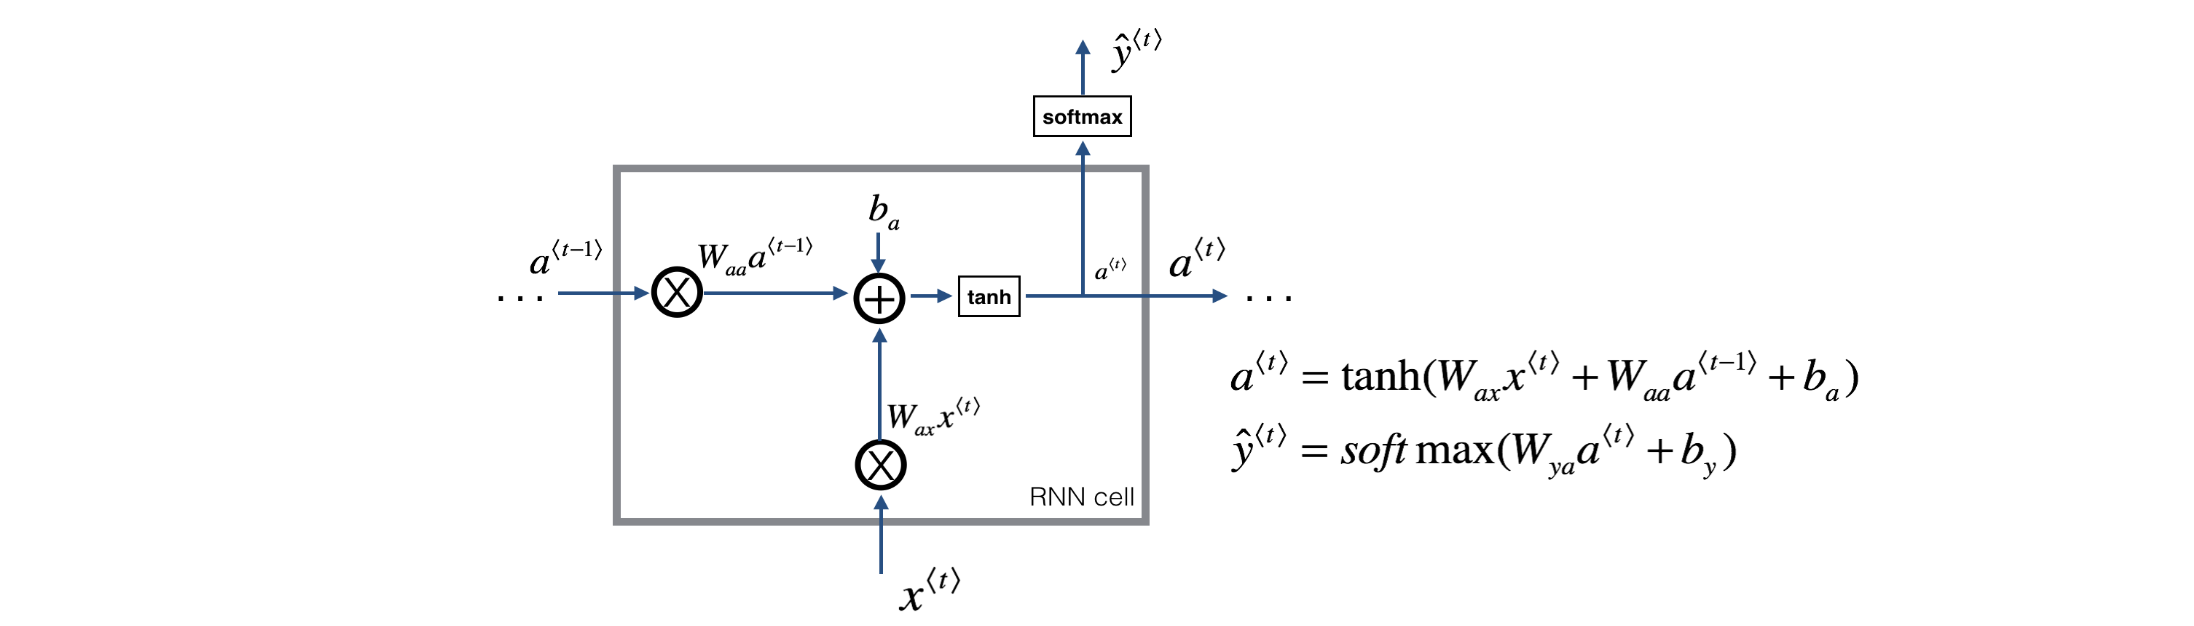

**Instructions**:
1. Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$.
2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. We provided you a function: `softmax`.
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in cache
4. Return $a^{\langle t \rangle}$ , $y^{\langle t \rangle}$ and cache

We will vectorize over $m$ examples. Thus, $x^{\langle t \rangle}$ will have dimension $(n_x,m)$, and $a^{\langle t \rangle}$ will have dimension $(n_a,m)$. 

In [1]:
# import libs
import numpy as np

In [2]:
# utils
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [6]:
def rnn_cell_forward(xt, a_prev, parameters):
    """
    A single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba  = parameters["ba"]
    by  = parameters["by"]
    
    # compute a_next
    a_next = np.tanh(np.dot(Waa, a_prev) + np.dot(Wax, xt) + ba)
    
    # compute yt
    yt_pred = softmax(np.dot(Wya, a_next) + by)
    
    # create cache 
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [5]:
# TESTING
np.random.seed(1)

# x with 3 features and 10 training examples
xt = np.random.randn(3,10)

# a_prev : random values of 5 hidden units with 10 weights each
a_prev = np.random.randn(5,10)
Waa = np.random.randn(5,5)

# weights of 5 neurons with 3 weights each
Wax = np.random.randn(5,3)

Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a_next, yt_pred, cache = rnn_cell_forward(xt, a_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

a_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


## 1.2 - RNN forward pass 

You can see an RNN as the repetition of the cell you've just built. If your input sequence of data is carried over 10 time steps, then you will copy the RNN cell 10 times. Each cell takes as input the hidden state from the previous cell ($a^{\langle t-1 \rangle}$) and the current time-step's input data ($x^{\langle t \rangle}$). It outputs a hidden state ($a^{\langle t \rangle}$) and a prediction ($y^{\langle t \rangle}$) for this time-step.

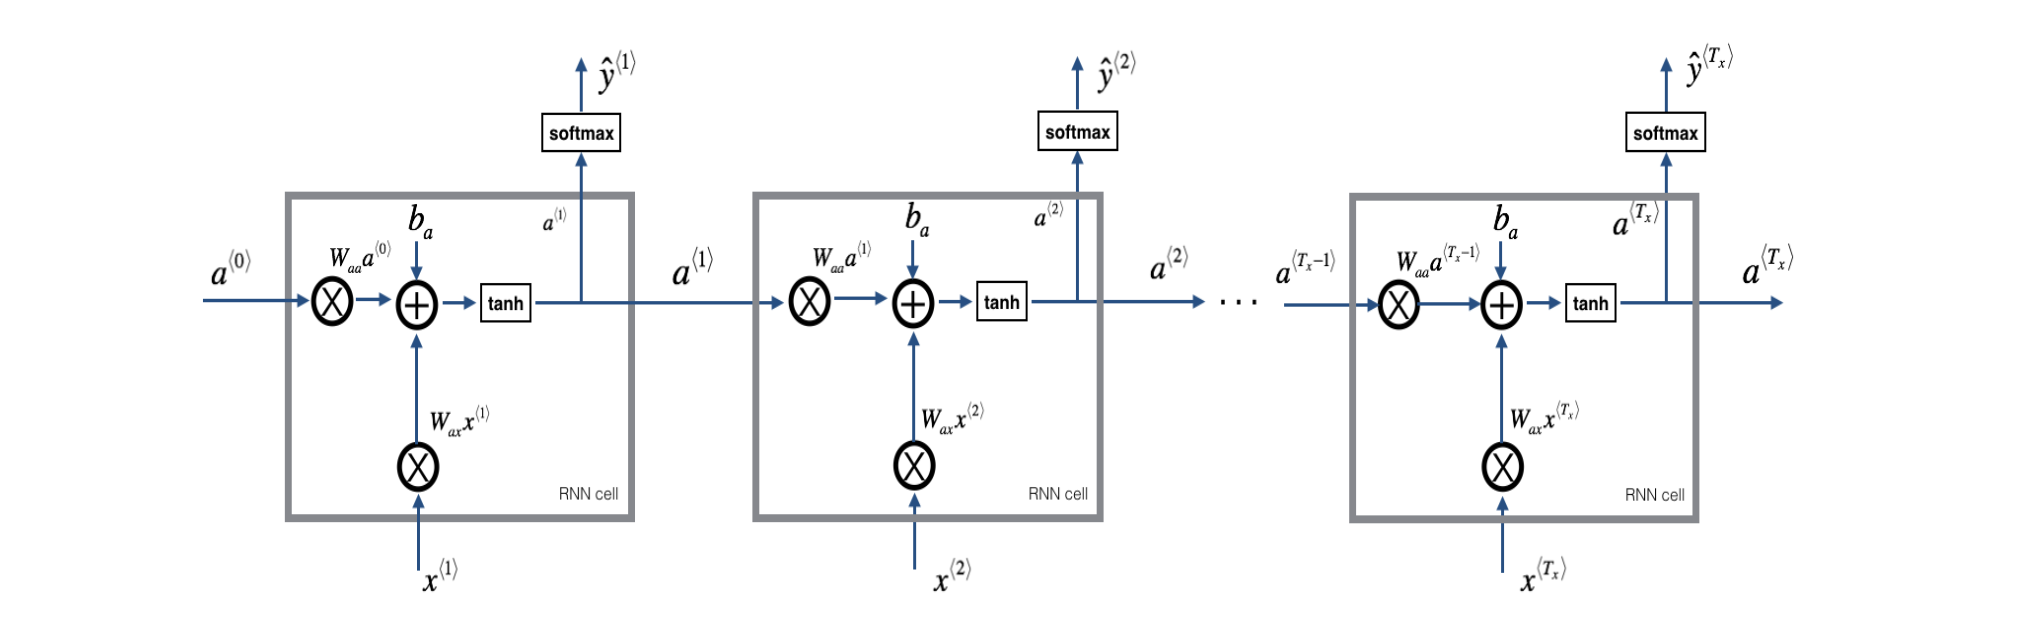


**Exercise**: Code the forward propagation of the RNN described in Figure (3).

**Instructions**:
1. Create a vector of zeros ($a$) that will store all the hidden states computed by the RNN.
2. Initialize the "next" hidden state as $a_0$ (initial hidden state).
3. Start looping over each time step, your incremental index is $t$ :
    - Update the "next" hidden state and the cache by running `rnn_cell_forward`
    - Store the "next" hidden state in $a$ ($t^{th}$ position) 
    - Store the prediction in y
    - Add the cache to the list of caches
4. Return $a$, $y$ and caches

In [ ]:
def rnn_forward(x, a0, parameters):
    """
    Forward propagation of the recurrent neural network described in above Figure

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                    Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                    Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                    Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                    ba --  Bias numpy array of shape (n_a, 1)
                    by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    # initialize "a" and "y" with zeros (≈2 lines)
    a = np.zeros(n_a, m, T_x)
    y_pred = np.zeros(n_y, m, T_x)
    
    # Initialize a_next (≈1 line)
    a_next = np.zeros(m, T_x)
    
    